In [2]:
# import all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import graphviz
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plot
from matplotlib.legend_handler import HandlerLine2D
from scipy import stats
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
df=pd.read_csv(r"C:\Users\Wally\Downloads\census_data.csv")

In [ ]:
#pip install six
#pip install pydotplus
#conda install graphviz

In [4]:
# take look at data - top 10 rows, shows binned data and bin ranges
df.head(10)

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
0           b. 31-40   b. Mid - Low   b. Mid         c. > 0      c. High   
1            a. 0-30        e. High  c. High         a. = 0      c. High   
2           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
3           b. 31-40         a. Low  c. High         a. = 0       b. Mid   
4           b. 31-40        e. High  c. High         a. = 0       a. Low   
5           b. 31-40        e. High  c. High         a. = 0       b. Mid   
6            a. 0-30         a. Low   b. Mid         a. = 0       a. Low   
7   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
8   d. 41-50 & 61-70        e. High   b. Mid         c. > 0       b. Mid   
9           b. 31-40        e. High  c. High         c. > 0      c. High   

  education_num_bin education_bin workclass_bin            age_bin   flag  y  
0             c. 13  c. Bachelors     b. income   d. 36-40 & 56-60  train  0  
1             c. 13  c. Bachelors     b. income           e. 40-55  train  0  
2           b. 9-12        b. Mid     b. income   d. 36-40 & 56-60  train  0  
3            a. 0-8        a. Low     b. income           e. 40-55  train  0  
4             c. 13  c. Bachelors     b. income  b. 26-30 & 71-100  train  0  
5             d. 14    d. Masters     b. income   d. 36-40 & 56-60  train  0  
6            a. 0-8        a. Low     b. income           e. 40-55  train  0  
7           b. 9-12        b. Mid     b. income           e. 40-55  train  1  
8             d. 14    d. Masters     b. income   c. 31-35 & 61-70  train  1  
9             c. 13  c. Bachelors     b. income           e. 40-55  train  1

In [5]:
# shows statistical data from dataframe - not very useful since the data has been binned
# looking for outliers but can't tell from this data
df.describe()

y
count  48842.000000
mean       0.239282
std        0.426649
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000

In [6]:
# shows shape of dataframe - 11 columns and 48,842 rows
df.shape

(48842, 11)

In [7]:
# looking for missing data - no nulls found, data looks clean
df.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [6]:
# looking for n/a - no n/a data looks ok
df.isna().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [7]:
# checking data types of columns - 0:9 are objects (binned data) and 10 is int64
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [8]:
# looking a tail (last 10 rows) - just to double check data
df.tail(10)

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
48832   d. 41-50 & 61-70   c. Mid - Mid  c. High         a. = 0      c. High   
48833           b. 31-40   c. Mid - Mid  c. High         a. = 0      c. High   
48834           b. 31-40         a. Low   a. Low         a. = 0       b. Mid   
48835           b. 31-40         a. Low   b. Mid         a. = 0      c. High   
48836           b. 31-40        e. High   a. Low         a. = 0      c. High   
48837           b. 31-40        e. High   b. Mid         a. = 0       b. Mid   
48838           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
48839   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48840           b. 31-40   b. Mid - Low   a. Low         c. > 0      c. High   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   

      education_num_bin education_bin workclass_bin           age_bin  flag  y  
48832           b. 9-12        b. Mid     b. income  c. 31-35 & 61-70  test  0  
48833           b. 9-12        b. Mid     b. income  c. 31-35 & 61-70  test  0  
48834           b. 9-12        b. Mid     b. income           a. 0-25  test  0  
48835             d. 14    d. Masters     b. income          e. 40-55  test  0  
48836             c. 13  c. Bachelors     b. income  c. 31-35 & 61-70  test  0  
48837             c. 13  c. Bachelors     b. income  d. 36-40 & 56-60  test  0  
48838           b. 9-12        b. Mid  a. no income  c. 31-35 & 61-70  test  0  
48839             c. 13  c. Bachelors     b. income  d. 36-40 & 56-60  test  0  
48840             c. 13  c. Bachelors     b. income          e. 40-55  test  0  
48841             c. 13  c. Bachelors     b. income  c. 31-35 & 61-70  test  1

In [9]:
# adding test data line at end before enumeration so that enumeration is used correctly on new data
# will use these values at the end to test new sample data
df.loc[len(df.index)] = [df.loc[7][0],df.loc[0][1],df.loc[1][2],df.loc[0][3],df.loc[3][4],df.loc[2][5],df.loc[96][6],df.loc[0][7],df.loc[0][8],df.loc[48841][9],df.loc[0][10]]

In [10]:
# check to see if last row is added to data set - will use this at the end (needed enumeration to work correctly)
df.tail()

hours_per_week_bin occupation_bin  msr_bin capital_gl_bin race_sex_bin  \
48838           b. 31-40   b. Mid - Low   a. Low         a. = 0       b. Mid   
48839   d. 41-50 & 61-70        e. High  c. High         a. = 0      c. High   
48840           b. 31-40   b. Mid - Low   a. Low         c. > 0      c. High   
48841           e. 51-60        e. High  c. High         a. = 0      c. High   
48842   d. 41-50 & 61-70   b. Mid - Low  c. High         c. > 0       b. Mid   

      education_num_bin education_bin workclass_bin           age_bin  flag  y  
48838           b. 9-12        b. Mid  a. no income  c. 31-35 & 61-70  test  0  
48839             c. 13  c. Bachelors     b. income  d. 36-40 & 56-60  test  0  
48840             c. 13  c. Bachelors     b. income          e. 40-55  test  0  
48841             c. 13  c. Bachelors     b. income  c. 31-35 & 61-70  test  1  
48842           b. 9-12       e. High     b. income  d. 36-40 & 56-60  test  0

In [11]:
# create a list of column names from frame - check that names were captured correctly 
# then remove 'flag' and 'y' because they are not a part of the training data
cols=list(df)
to_be_removed=['flag','y']
cols=[i for i in cols if i not in to_be_removed]
cols

['hours_per_week_bin',
 'occupation_bin',
 'msr_bin',
 'capital_gl_bin',
 'race_sex_bin',
 'education_num_bin',
 'education_bin',
 'workclass_bin',
 'age_bin']

In [12]:
# DecisionTreeClassifier cannot handle categorical data natively - all data is enumerated (excepting 'flag' and 'y')
# 'flag' and 'y' are not used to train
# duplicate dataframe is created and then modified using OrdinalEncoder
encoder = OrdinalEncoder()
df_enum=df
df_enum[cols]=encoder.fit_transform(df[cols])

In [13]:
# check to see if dataframe enumberated properly - yes, dataframe looks good
df_enum

hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  \
0                     1.0             1.0      1.0             2.0   
1                     0.0             4.0      2.0             0.0   
2                     1.0             0.0      1.0             0.0   
3                     1.0             0.0      2.0             0.0   
4                     1.0             4.0      2.0             0.0   
...                   ...             ...      ...             ...   
48838                 1.0             1.0      0.0             0.0   
48839                 3.0             4.0      2.0             0.0   
48840                 1.0             1.0      0.0             2.0   
48841                 4.0             4.0      2.0             0.0   
48842                 3.0             1.0      2.0             2.0   

       race_sex_bin  education_num_bin  education_bin  workclass_bin  age_bin  \
0               2.0                2.0            2.0            1.0      3.0   
1               2.0                2.0            2.0            1.0      4.0   
2               2.0                1.0            1.0            1.0      3.0   
3               1.0                0.0            0.0            1.0      4.0   
4               0.0                2.0            2.0            1.0      1.0   
...             ...                ...            ...            ...      ...   
48838           1.0                1.0            1.0            0.0      2.0   
48839           2.0                2.0            2.0            1.0      3.0   
48840           2.0                2.0            2.0            1.0      4.0   
48841           2.0                2.0            2.0            1.0      2.0   
48842           1.0                1.0            4.0            1.0      3.0   

        flag  y  
0      train  0  
1      train  0  
2      train  0  
3      train  0  
4      train  0  
...      ... ..  
48838   test  0  
48839   test  0  
48840   test  0  
48841   test  1  
48842   test  0  

[48843 rows x 11 columns]

In [18]:
# separate the enumerated data into train and test segments using the 'flag' column
df_train=df.loc[df_enum['flag']=='train']
df_test=df.loc[df_enum['flag']=='test']

In [19]:
# strip off 'flag' and 'y' columns from X valued data (both train and test data)
# create y data (outcome data) to be used to validate prediction
X_train=df_train[cols]
X_test=df_test[cols]
y_train=df_train['y']
y_test=df_test['y']

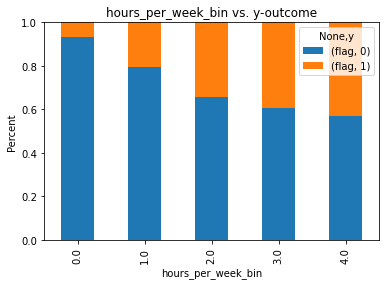

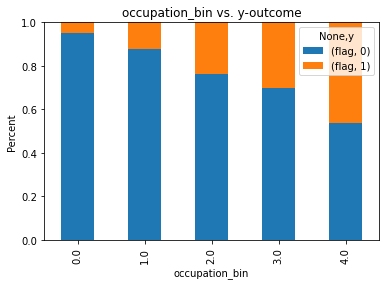

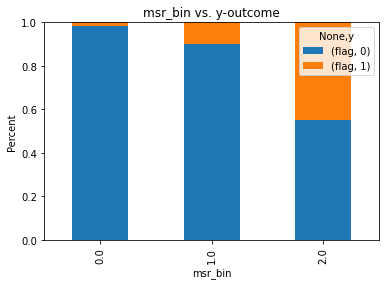

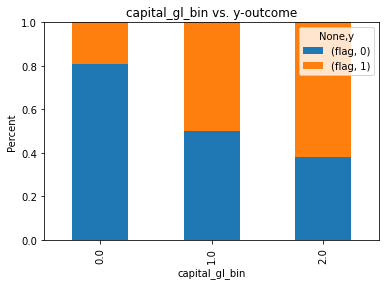

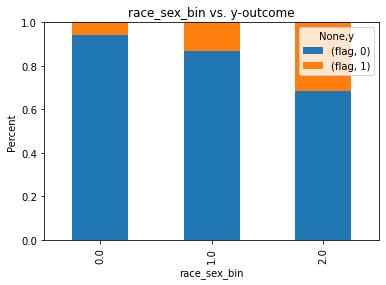

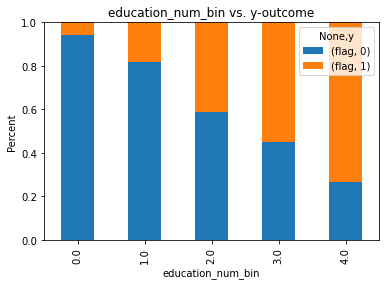

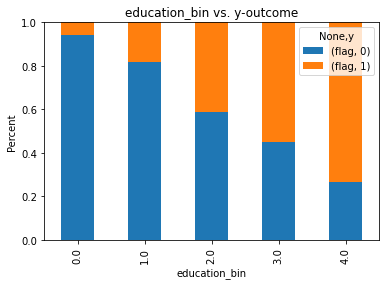

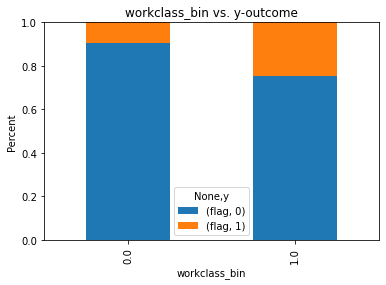

In [15]:
# create data graphs showing 'y' outcome by category bin
for col in cols:
    dfage=df[[col,'y','flag']].groupby([col,'y']).count().unstack()
    dfage['total']=dfage[('flag',0)]+dfage[('flag',1)]
    dfage[('flag',0)]=dfage[('flag',0)]/dfage['total']
    dfage[('flag',1)]=dfage[('flag',1)]/dfage['total']
    del dfage['total']
    dfage.plot(kind='bar',stacked='true',label="Age Bin")
    plot.ylim(0,1)
    plot.title(col +' vs. y-outcome')
    plot.xlabel(col)
    plot.ylabel('Percent')

In [21]:
# confirming X_training data looks as it should - checking that data is enumerated and 'flag' and 'y' columns absent
X_train.head()

hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  race_sex_bin  \
0                 1.0             1.0      1.0             2.0           2.0   
1                 0.0             4.0      2.0             0.0           2.0   
2                 1.0             0.0      1.0             0.0           2.0   
3                 1.0             0.0      2.0             0.0           1.0   
4                 1.0             4.0      2.0             0.0           0.0   

   education_num_bin  education_bin  workclass_bin  age_bin  
0                2.0            2.0            1.0      3.0  
1                2.0            2.0            1.0      4.0  
2                1.0            1.0            1.0      3.0  
3                0.0            0.0            1.0      4.0  
4                2.0            2.0            1.0      1.0

In [24]:
# setting up DecisionTreeClassifier with basic parameters
# fiiting tree using trainging data (both X_train and y_train)
# make a prediction using fitted data model
dtree = DecisionTreeClassifier(max_depth=10, random_state=101, max_features=None, min_samples_leaf=15)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)

In [25]:
# using outcome of prediction to determine success rate
# initial outcome is so-so at around 74%
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7437104287001972

In [27]:
# visualizing decision tree graphically using given parameters
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.772916 to fit



In [22]:
# displaying a confusion matrix with TP, TN, FP, FN values 
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['Predicted True', "Predicted False"], index=['Actual True', 'Actual False'])

Predicted True  Predicted False
Actual True            11607              828
Actual False            1715             2131

In [29]:
# displaying precision, recall, f1-score and support for decision tree
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12436
           1       0.72      0.55      0.63      3846

    accuracy                           0.84     16282
   macro avg       0.80      0.74      0.76     16282
weighted avg       0.84      0.84      0.84     16282



In [30]:
# another view of confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

True Positives: 2131
False Positives: 829
True Negatives: 11607
False Negatives: 1715


In [34]:
# using logisticRegression to aid in creating ROC plot
lr=LogisticRegression()
lr.fit(X_train,y_train)
preds=lr.predict(X_test)

In [35]:
# setting threshold and probabilities level for ROC plot
probas = lr.predict_proba(X_test)[:, 1]
def get_preds(threshold, probabilities):
    return [1 if prob > threshold else 0 for prob in probabilities]

In [38]:
# continue setting up for ROC graph
roc_values = []
for thresh in np.linspace(0, 1, 100):
    preds = get_preds(thresh, probas)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)
    roc_values.append([tpr, fpr])
tpr_values, fpr_values = zip(*roc_values)

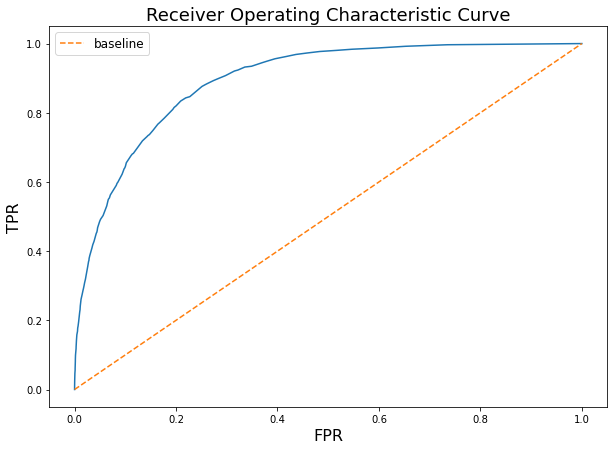

In [41]:
# displaying the ROC curve graph using matplotlib
fig, ax = plot.subplots(figsize=(10,7))
ax.plot(fpr_values, tpr_values)
ax.plot(np.linspace(0, 1, 100),
         np.linspace(0, 1, 100),
         label='baseline',
         linestyle='--')
plot.title('Receiver Operating Characteristic Curve', fontsize=18)
plot.ylabel('TPR', fontsize=16)
plot.xlabel('FPR', fontsize=16)
plot.legend(fontsize=12);

In [45]:
# using different parameters to test fitness of model
dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=2,min_samples_leaf=1,max_depth=2,random_state=101)
dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12436
           1       0.72      0.41      0.52      3846

    accuracy                           0.82     16282
   macro avg       0.78      0.68      0.70     16282
weighted avg       0.81      0.82      0.80     16282



In [42]:
# contining using different parameters ot test fitness of model
dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=2,min_samples_leaf=1,max_depth=4,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12436
           1       0.71      0.51      0.59      3846

    accuracy                           0.83     16282
   macro avg       0.78      0.72      0.75     16282
weighted avg       0.82      0.83      0.82     16282



In [43]:
# contining using different parameters ot test fitness of model
dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=0.5,min_samples_leaf=1,max_depth=4,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12436
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16282
   macro avg       0.38      0.50      0.43     16282
weighted avg       0.58      0.76      0.66     16282



C:\Users\semic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# contining using different parameters ot test fitness of model
dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=0.2,min_samples_leaf=3,max_depth=4,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     12436
           1       0.69      0.52      0.59      3846

    accuracy                           0.83     16282
   macro avg       0.77      0.72      0.74     16282
weighted avg       0.82      0.83      0.82     16282



In [46]:
# contining using different parameters ot test fitness of model
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=3,max_depth=4,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12436
           1       0.71      0.51      0.59      3846

    accuracy                           0.83     16282
   macro avg       0.78      0.72      0.75     16282
weighted avg       0.82      0.83      0.82     16282



In [35]:
# contining using different parameters ot test fitness of model
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=3,max_depth=2,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89     12435
           1       0.72      0.41      0.52      3846

    accuracy                           0.82     16281
   macro avg       0.78      0.68      0.70     16281
weighted avg       0.81      0.82      0.80     16281



In [47]:
# contining using different parameters ot test fitness of model
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=2,min_samples_leaf=1,max_depth=4,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     12436
           1       0.71      0.51      0.59      3846

    accuracy                           0.83     16282
   macro avg       0.78      0.72      0.75     16282
weighted avg       0.82      0.83      0.82     16282



In [48]:
# contining using different parameters ot test fitness of model
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=4,min_samples_leaf=4,max_depth=6,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12436
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16282
   macro avg       0.79      0.75      0.77     16282
weighted avg       0.84      0.84      0.84     16282



In [49]:
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=5,min_samples_leaf=5,max_depth=10,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12436
           1       0.71      0.56      0.63      3846

    accuracy                           0.84     16282
   macro avg       0.79      0.75      0.76     16282
weighted avg       0.84      0.84      0.84     16282



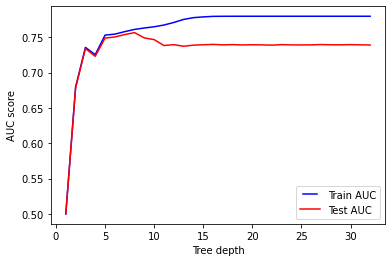

In [51]:
# using for loop to test variations on max_depth parameter to check for fitness
# fitness does not improve after a depth of 10
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   dtree = DecisionTreeClassifier(max_depth=max_depth)
   dtree.fit(X_train, y_train)
   train_pred = dtree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous train results
   train_results.append(roc_auc)
   y_pred = dtree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   # Add auc score to previous test results
   test_results.append(roc_auc)

line1, = plot.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plot.plot(max_depths, test_results, 'r', label='Test AUC')
plot.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plot.ylabel('AUC score')
plot.xlabel('Tree depth')
plot.show()

In [52]:
# using for loop to test variations on min_samples_split parameter to check for fitness
# fitness declines with a min_samples_split parameter above 0.4
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
train_results = []
test_results = []
for min_samples_split in min_samples_splits:
   dtree = DecisionTreeClassifier(min_samples_split=min_samples_split)
   dtree.fit(X_train, y_train)
   train_pred = dtree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds =    roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dtree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plot.plot(min_samples_splits, train_results, 'b', label='Train AUC')
line2, = plot.plot(min_samples_splits, test_results, 'r', label='Test AUC')
plot.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plot.ylabel('AUC score')
plot.xlabel('min samples split')
plot.show()

In [41]:
# using for loop to test variations on min_samples_lear parameter to check for fitness
# fitness declines above around 0.15
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
   dtree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
   dtree.fit(X_train, y_train)
   train_pred = dtree.predict(X_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = dtree.predict(X_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
line1, = plot.plot(min_samples_leafs, train_results, 'b', label='Train AUC')
line2, = plot.plot(min_samples_leafs, test_results, 'r', label='Test AUC')
plot.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plot.ylabel('AUC score')
plot.xlabel('min samples leaf')
plot.show()

In [53]:
# completely automated library function that tests a series of parameters
# best guess using automated system is 0.839 (better than self-checks)
# best parameters: 'criterion': 'gini', 'max_depth': None, 'max_features': 4, 'min_samples_leaf': 7
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9),
              "criterion": ["gini", "entropy"]}

# Instantiate a Decision Tree classifier: tree
dtree = DecisionTreeClassifier()

# Instantiate the RandomizedSearchCV object: tree_cv
dtree_cv = RandomizedSearchCV(dtree, param_dist, cv=5)

# Fit it to the data
dtree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(dtree_cv.best_params_))
print("Best score is {}".format(dtree_cv.best_score_))

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 8}
Best score is 0.8395320915530495


In [159]:
# double checking roc_auc scores for hand done tests - worse performance than automated
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=4,min_samples_leaf=4,max_depth=6,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.88      0.93      0.90     12435
           1       0.71      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.77     16281
weighted avg       0.84      0.84      0.84     16281



0.7504799685352915

In [45]:
# double checking roc_auc scores for hand done tests - worse performance than automated
dtree = DecisionTreeClassifier(criterion='entropy',min_samples_split=0.5,min_samples_leaf=1,max_depth=4,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
print(classification_report(y_test,y_pred))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

              precision    recall  f1-score   support

           0       0.76      1.00      0.87     12435
           1       0.00      0.00      0.00      3846

    accuracy                           0.76     16281
   macro avg       0.38      0.50      0.43     16281
weighted avg       0.58      0.76      0.66     16281



C:\Users\semic\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.5

In [55]:
# checking our test sample question - previously loaded to end of dataset
X_test.tail()

hours_per_week_bin  occupation_bin  msr_bin  capital_gl_bin  \
48838                 1.0             1.0      0.0             0.0   
48839                 3.0             4.0      2.0             0.0   
48840                 1.0             1.0      0.0             2.0   
48841                 4.0             4.0      2.0             0.0   
48842                 3.0             1.0      2.0             2.0   

       race_sex_bin  education_num_bin  education_bin  workclass_bin  age_bin  
48838           1.0                1.0            1.0            0.0      2.0  
48839           2.0                2.0            2.0            1.0      3.0  
48840           2.0                2.0            2.0            1.0      4.0  
48841           2.0                2.0            2.0            1.0      2.0  
48842           1.0                1.0            4.0            1.0      3.0

In [57]:
# double checking values in test sample question (enumerated previously)
X_test.loc[48842]

hours_per_week_bin    3.0
occupation_bin        1.0
msr_bin               2.0
capital_gl_bin        2.0
race_sex_bin          1.0
education_num_bin     1.0
education_bin         4.0
workclass_bin         1.0
age_bin               3.0
Name: 48842, dtype: float64

In [60]:
# using best decision tree test sample data
# outcome is 1 (True for income >= 50,000) for test case
# 84% accuracy is expected
dtree = DecisionTreeClassifier(criterion='gini',min_samples_split=4,min_samples_leaf=8,max_depth=None,random_state=101)
dt=dtree.fit(X_train,y_train)
y_pred=dtree.predict([X_test.loc[48842]])
print(y_pred)

[1]


In [61]:
# visual rendering of optimized tree with adjusted tree parameters
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.48602 to fit

